# Creating User Profiles

*Moses Surumen, Ellen Peng, Kuhuk Goyal*  
*CS 194-31  Final Project*  
*Project Name: Music Networks*

---

## File Descriptions

| File                 | Description                            | 
| :--------------------|--------------------------------------: |
| train_triplets.txt   | Provides tuples of user-song-playcount 
| taste_profiles.csv   | Sorted train_triplets by users
| new_data_dict.txt    | Provides a mapping of users to a list of all songs they played at least 25 times
| songs.csv            | All Million Song Dataset Songs
| similar_songs.db     | Sqlite3 database of song communities derived from Part 1

---

In [42]:
# Import Whole Graph and Community Partitions from Part 1
%store -r G
%store -r G_main_com
%store -r partition
%store -r communities

In [14]:
# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

# Reading Dictionaries
import json

import random

___

## Get Echo Nest Taste Profile

In [ ]:
df = pd.read_csv('data/train_triplets.txt', delimiter="\t", header=None, names=["User", "Song", "Playcount"])

In [5]:
df.head()

,User,Song,Playcount
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [6]:
df.shape[0]

48373586

In [7]:
df.shape[1]

3

___

## Pre-Processing Data

We drop all songs from our dataset which have been played less that 25 times, and write the updated dataset to a different file

In [14]:
df.drop(df.loc[df['Playcount'] < 25].index, inplace=True)

In [15]:
df.shape[0]

476267

In [16]:
df.head()

,User,Song,Playcount
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
787,5a905f000fc1ff3df7ca807d57edb608863db05d,SOMVTRL12A67AE0921,28
1326,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,SOGKEGN12AB0185355,26
2148,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOQGETC12AB017F1E5,26
2209,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOYZLWW12AB0186148,55


In [17]:
df.to_csv("taste_profiles.csv", encoding='utf-8', index=False)

## Sort Dataframe based on User IDs

In [ ]:
df.sort_values('User')

## Create Hashmap with Values as Songs and Keys as Users

In [19]:
from collections import defaultdict

In [20]:
data_dict = defaultdict(list)
for k, v in zip(df.User.values,df.Song.values):
    data_dict[k].append(v)

In [21]:
len(data_dict)

187548

## Write Dictionary to File

In [26]:
import json

In [27]:
json.dump(data_dict, open("data_dict.txt",'w'))

____

# User-Profile Construction

In [1]:
# Function that maps users to songs
def map_users_to_songs(data_file):
    hashmap = dict()
    with open(data_file,"r") as f:
        for line in f:
            user,song,_ = line.strip().split('\t')
            if user in hashmap:
                hashmap[user].add(song)
            else:
                hashmap[user] = set([song])
    return hashmap

In [2]:
# Function that maps song communities from Part 2 to users
def project_songs_to_users(data_file, set_users=None, ratio=1.0):
    hashmap = dict()
    with open(data_file,"r") as f:
        for line in f:
            if random.random()<ratio:
                user,song,_=line.strip().split('\t')
                if not set_users or user in set_users:
                    if song in hashmap:
                        hashmap[song].add(user)
                    else:
                        hashmap[song]=set([user])
    return hashmap

In [9]:
### Generates similar songs in the network 
def compute_similarity(current_songs, playlist):
    similarity ={}
    for s in playlist:
        similarity[s]=0.0
        if not (s in self.s2u_tr):
            continue
        for u_song in ucurrent_songs:
            if not (u_song in self.s2u_tr):
                continue
            min_sim = 0.7
            similarity[s]+=math.pow(min_sim,3)
    return similarity

def generate_similars(current_songs, G):
    similars ={}
    for s in G:
        similars[s]=0.0
        for u_song in current_songs:
            min_sim = 0.7
            similars[s]+=math.pow(0.7,3)
    return similars

In [8]:
def generateRec(user, user_song_map):
    songs_for_user_sorted =[]
    for p in self.predictors:
        ssongs=[]
        if user in user_song_map:
            ssongs = sort_dict_dec(p.Score(user_song_map[user],all_songs))
        else:
            ssongs=list(all_songs)

        recommended_songs = []
        for x in ssongs:
            if len(recommended_songs)>=50:  ###### Only recommend a max of 50 songs
                break
            if x not in user_song_map[user]:
                recommended_songs.append(x)   #### add song to list
        songs_for_user_sorted += [recommended_songs]
    return songs_for_user_sorted 

____

## Train Recommender

In [3]:
train_data = "data/train_data.txt"

In [11]:
def get_users(if_str):
    all_users = set()
    with open(if_str,"r") as f:
        for line in f:
            user,_,_=line.strip().split('\t')
            if user not in all_users:
                all_users.add(user)
    return all_users 

In [12]:
all_users = get_users(train_data)


train_users = {}
for k,v in enumerate(all_users):
    train_users[v] = k

In [17]:
# project users to micro-genres
user_micro_genres = project_songs_to_users(train_data)

In [19]:
# get neighbors of each node in the user's training set
def nearestneighbors(G, node):
    result = []
    for k, v in first_five_train.items():
        # set max neighborhood size to 12
        for i in range(12):
            result.append(G.neighbors(song for song in v))
    return result

In [12]:
user_min,user_max,osfile = 1,100,"user_predictions.txt"
user_min=int(user_min)
user_max=int(user_max)

print("user_min: %d , user_max: %d"%(user_min,user_max))

user_min: 1 , user_max: 100


In [15]:
### s : current song entered by user
### G : our songs network imported from Part 1
print('Creating predictor..')
recommendations = generateRec(s, song_map)

Creating predictor..


____

## Evaluate Test Data

In [22]:
test_data = "data/test_data.txt"

In [23]:
new_users = get_users(test_data)


test_users = {}
for k,v in enumerate(new_users):
    test_users[v] = k

In [24]:
# project users to micro-genres
user_micro_genres = project_songs_to_users(test_data)

In [25]:
# get neighbors of each node in the user's training set
def nearestneighbors(G, node):
    result = []
    for k, v in first_five_train.items():
        # set max neighborhood size to 50
        for i in range(50):
            result.append(G.neighbors(song for song in v))
    return result

In [ ]:
## write prediction to file
json.dumps(dict(nearestneighbors(G, node) for node in user_micro_genres))

____

## Cross-Validation

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/Users/moses/miniconda3/envs/16b/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%store -r users
%store -r songs_recommended

In [7]:
train_users, test_users, train_songs_recommended, test_songs_recommended = train_test_split(users, songs_recommended, random_state=6)

# check classification accuracy of KNN with K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_users, train_songs_recommended)
predicted_songs = knn.predict(test_users)
metrics.accuracy_score(test_songs_recommended, predicted_songs)

0.4736842105263158


## Plot Confusion Matrix

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [62]:
def plot_confusion_matrix(
    ax, matrix, labels, title='Confusion matrix', fontsize=9):

    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    #Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Reds)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('Test Songs', fontsize=fontsize)
    ax.set_ylabel('Validation Songs', fontsize=fontsize)

    plt.show()

/Users/moses/miniconda3/envs/16b/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/moses/miniconda3/envs/16b/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


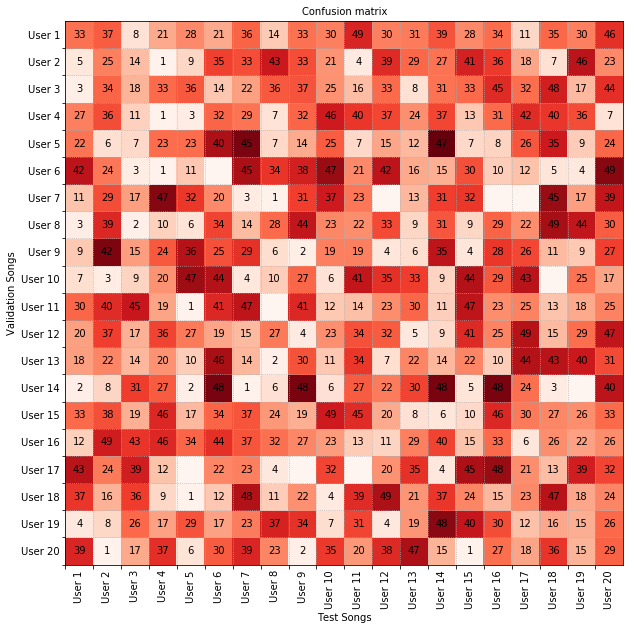

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(ax, predicted_songs, labels=test_users, fontsize=10)

___

In [ ]:
########## PRE-PROCESSING STUFF   ##########

____

____

## Remove Key-Value pairs with less than 25 Songs

In [36]:
new_data_dict = data_dict

In [37]:
len(new_data_dict)

24720

In [38]:
for k in sorted(new_data_dict, key=lambda k: len(new_data_dict[k]), reverse=True):
    if len(new_data_dict[k]) < 25:
        del new_data_dict[k]

In [39]:
len(new_data_dict)

274

In [41]:
json.dump(new_data_dict, open("new_data_dict.txt",'w'))

In [ ]:
%cat new_data_dict.txt

____

## Match SongIDs to TrackIDs

The Echo Nest Tastes Profiles contained a bug where there were mismatches between song-track IDs from those available in the Million Song Dataset. The mismatched songs are stored in a file **song_track_mismatches.txt** and the affected songs are removed manually from ***taste_profiles.csv**

In [18]:
tastes = pd.read_csv('data/taste_profiles.csv')
songs = pd.read_csv('data/songs.csv')

In [19]:
songs = songs.drop(['song_name', 'danceability', 'duration','energy','loudness'], axis=1)

In [20]:
songs.head()

,song_id,track_id
0,SOGSOUE12A58A76443,TRARRPG12903CD1DE9
1,SOVVDCO12AB0187AF7,TRARRER128F9328521
2,SOZQSGL12AF72A9145,TRARREF128F422FD96
3,SOBTEHX12A6D4FBF18,TRARRQO128F427B5F5
4,SOXGDVW12AB01864E7,TRARRMK12903CDF793


In [21]:
tastes.head()

,User,Song,Playcount
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
1,5a905f000fc1ff3df7ca807d57edb608863db05d,SOMVTRL12A67AE0921,28
2,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,SOGKEGN12AB0185355,26
3,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOQGETC12AB017F1E5,26
4,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOYZLWW12AB0186148,55


In [8]:
songs_dict = dict()
for index, row in songs.iterrows():
    songs_dict[row[0]] = row[1]

In [9]:
from itertools import islice
dict(islice(songs_dict.items(), 0, 2))

{'SOGSOUE12A58A76443': 'TRARRPG12903CD1DE9',
 'SOVVDCO12AB0187AF7': 'TRARRER128F9328521'}

____

In [43]:
print('Number of major micro-genres', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

Number of major micro-genres 85

Main communities and their center node: {4: 'SODSOBX12AC4686B4D', 9: 'SOTIDVB12A58A7E5C7', 11: 'SOVBQWR12A8C137843', 16: 'SOYWZTU12AB0180E26', 19: 'SOJLDJL12A81C238A0', 25: 'SOWPAXV12A67ADA046', 32: 'SOSXQPZ12AB01800CB', 33: 'SOXYNYD12A8C13DF7B', 36: 'SOTAMUT12A8C13757E', 42: 'SOFMHGN12A8C136BCB', 52: 'SOCIJOM12A58A7CBF8', 55: 'SOKJEMV12A8C1374AD', 57: 'SOWRILA12A8C1360D0', 59: 'SOQTFZH12AB0188264', 62: 'SOCUDML12A5829113A', 63: 'SOPOSOZ12AB018C568', 64: 'SOPSDCQ12A8C135CB6', 65: 'SODOOMJ12AB0185178', 68: 'SOGXGUK12A6D4FC1B4', 72: 'SOUTQDI12A67AE11FD', 75: 'SOACLMC12A8C13FA4C', 79: 'SOLBPPU12AB0187DD7', 86: 'SODRQRZ12A58A7BBC4', 88: 'SOYNXWG12AC468F51A', 97: 'SOEEEIL12A8C138EEE', 99: 'SOUNCKW12AB0188044', 109: 'SONOVXO12AB01877FE', 110: 'SOYBNLW12A6D4FC930', 124: 'SOGRGML12A8C136D75', 140: 'SOUTLPX12A8C133854', 142: 'SOTUHSG12A8AE474EA', 157: 'SOVNIWE12A8C144C9E', 159: 'SOEDGSG12AB0184A57', 161: 'SOVQQYE12AB0183BD8', 166: 'SOXMSDY12A8C142C7E', 176: 'SOL

In [56]:
from sklearn.model_selection import train_test_split

In [ ]:
# set training data to be first half of a user's playlist
# set testing data to be second half of a user's playlist
train_data, test_data = train_test_split(X, y, test_size=(len(all_users[k])//2)) 

In [34]:
# training data to be first half of a user's playlist
train_data = {k: all_users[k][0:(len(all_users[k])//2)] for k in all_users.keys()}

In [35]:
# sanity check
dict(islice(train_data.items(), 0, 2))

{'c0ff0f1c93f67c1fb372b36b1b08bb4c76bead7d': ['SOAKPQJ12A8C13D812',
  'SOBGXEU12A8AE45903',
  'SOBQWQX12A58A80CF8',
  'SOBWWUF12A8C13AC82',
  'SOCSBXQ12AB01806AC',
  'SOEYEQN12A58A75F3F',
  'SOFNSLY12A8C13B1C2',
  'SOFTXKI12A6D4F71DA',
  'SOFUHZF12A6D4F5A3F',
  'SOHZPVD12AB01839E8',
  'SOIOZPA12A8C137498',
  'SOJDIWD12AB0186CE9',
  'SOLAPGI12AF72A3955',
  'SONMSZZ12A6701F352'],
 '283882c3d18ff2ad0e17124002ec02b847d06e9a': ['SOAKMDU12A8C1346A9',
  'SOAXGDH12A8C13F8A1',
  'SOAYCLH12A81C22D59',
  'SOCCYYG12AB0184DE8',
  'SOCQOZB12AB0185685',
  'SOFEJPJ12A8C145455',
  'SOGBFOO12A6D4FC933',
  'SOHFJAQ12AB017E4AF',
  'SOHFNKO12AB017C772',
  'SOHGWFC12AB017F2E7',
  'SOKUECJ12A6D4F6129',
  'SOMCAFM12A58A7B024',
  'SOMKDZU12AB0185690',
  'SOOALOT12A8C13ABD9']}

In [36]:
# testing data to be second half of a user's playlist
test_data = {k: all_users[k][(len(all_users[k])//2):] for k in all_users.keys()}

In [37]:
# sanity check
dict(islice(test_data.items(), 0, 2))

{'c0ff0f1c93f67c1fb372b36b1b08bb4c76bead7d': ['SOOOLOP12AB0189B72',
  'SOOPHIF12A6D4F71DC',
  'SOPAJOR12A58A81CC0',
  'SOTSJHY12AF729C1A9',
  'SOUNQLL12A6D4F5A3B',
  'SOUYDLS12A6D4F6C0B',
  'SOVGANS12A81C2268D',
  'SOVNFJP12AF72A6545',
  'SOVNHMU12A6D4F5A38',
  'SOWKLHD12A67020290',
  'SOXALRW12A8159E8D5',
  'SOXASRE12A6D4F6C0C',
  'SOXKBTV12AF72A3A89',
  'SOXXZRM12A6D4F7F22'],
 '283882c3d18ff2ad0e17124002ec02b847d06e9a': ['SOODSPH12AB01819C3',
  'SOOEEPE12A8AE459A4',
  'SOOJQUT12A8C13EDA8',
  'SOPUCYA12A8C13A694',
  'SOQYRUF12AC3DF7136',
  'SOSLQGG12A6D4F5045',
  'SOSNGDI12A6D4FB4A1',
  'SOTEFFR12A8C144765',
  'SOTLAOJ12A6D4FB4B2',
  'SOURSIU12A8C140B9A',
  'SOWJIBM12A81C2242B',
  'SOWPRYI12A58A7B51A',
  'SOXIEDM12AB018A952',
  'SOYDETO12A6D4F6F7E',
  'SOZVCRW12A67ADA0B7']}

____

In [67]:
#Get the nearest 12 neighbors in the database based on similarity
join_statement = 'sid_tag JOIN tids ON (sim_measure >= 0.7) JOIN \
tags ON (tags.ROWID=sim_measure) JOIN track_id ON (sim_measure >= 0.7)'

query = "SELECT tids.tid, song_name, artist_name FROM {0} LIMIT 12;".format(join_statement)

In [57]:
pd.read_sql_query(query[0], conn)

{'Juelz Santana': '45', 'Beenie Man': '35'}


______

In [61]:
import sqlite3
conn = sqlite3.connect("data/similar_songs.db")
cursor = conn.cursor()

In [63]:
# See tables in database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [ ]:
pd.read_sql_query("SELECT * FROM songs", conn)

In [60]:
# User 1
# 7 out of 14 similarities : 
# Juelz Santana - Why ; 
# Juelz Santana - Squalie; 
# Juelz Santana - This Is For My Homies; 
# Juelz Santana - Shottas;
# Juelz Santana - Lil' Boy Fresh; 
# Juelz Santana - Intro (What The Game's Been Missing);
# Juelz Santana - Let's Go


#   50% accuracy for querried user

In [ ]:
# User 2
# 6 out of 15 similarities : 
# Los Campesinos - You! Me! Dancing!
# Angus & Julia Stone - Mango Tree
# The Killers - Somebody Told Me
# Angus & Julia Stone - Just A Boy
# Modest Mouse - Float On
# Angus & Julia Stone - Black Crow

#   ~40% accuracy for querried user

In [69]:
##############################################################################################################
#                       AUTOMATING SONG COMMUNITY DATABASE SEARCH
##############################################################################################################




 
#     Pushed database to Heroku postgresql dynos ................. DONE
#     Database server: https://surumen-mixtape.herokuapp.com  ........ SERVER LIVE


#     Front-end query site hosted on Github page:   https://surumen.github.io/mixtape/ ........... DONE
#     Code for query site:     https://github.com/surumen/mixtape